$$
\large \textbf{Problema 03}
$$

Considere una barra con una carga axial aplicada de $T=-20\:\frac{N}{cm^2}$, como se muestra en la figura. Determine el desplazamiento axial y la tensión. Tome $E=210\:GPa$, $A=10\:cm^2$ y $L=1.50\:m$. Use primero uno y luego dos elementos. Intente generalizarlo a $n$ elementos y compare sus resultados con la solución teórica:

$$
d(x)=\frac{|T|}{6\:A\:E}(x^3-L^3) \:\:\:\:\:\:\:\:\:\: ; \:\:\:\:\:\:\:\:\:\: \sigma(x)=\frac{|T|}{2\:A}x^2
$$

<center><img src="ImgProb03.png"></center>

***

In [1]:
import mef
import numpy as np                # Librería de álgebra lineal
import matplotlib.pyplot as plt   # Librería de gráficos
plt.rc('figure', figsize=(10, 7))
plt.rc('font', size=14)

## Datos del problema

In [2]:
c = -2000   # N/m
L = 1.5     # m

In [3]:
Ne = 3

In [4]:
E = 2.1E11*np.ones([Ne, 1])    # Pa
A = 1E-3*np.ones([Ne, 1])      # m^2

## Resolución

In [5]:
U, F, sig, R = mef.Ej03_solve(c, L, Ne, E, A)

In [6]:
print()
print('\033[1m Desplazamientos y fuerzas en cada nodo: \033[0m')
for nodo in range(Ne+1):
    print('\033[1m \033[33m    Nodo %2s \033[0m   U = %6.3f um     F = %7.1f N' % (nodo+1, U[nodo]*1e6, F[nodo]))
print()
print('\033[1m Tensiones en cada elemento: \033[0m')
for elem in range(Ne):
    print('\033[1m \033[33m    Elem %2s \033[0m   T = %6.1f kPa' % (elem+1, sig[elem]*1E-3))
print()
print('\033[1m Reacción del empotramiento: \033[0m')
print('     R = %7.4f N' % (R))


 Desplazamientos y fuerzas en cada nodo: 
     Nodo  1    U = -5.357 um     F =   -83.3 N
     Nodo  2    U = -5.159 um     F =  -500.0 N
     Nodo  3    U = -3.770 um     F = -1000.0 N
     Nodo  4    U =  0.000 um     F =  1583.3 N

 Tensiones en cada elemento: 
     Elem  1    T =   83.3 kPa
     Elem  2    T =  583.3 kPa
     Elem  3    T = 1583.3 kPa

 Reacción del empotramiento: 
     R = 2250.0000 N


## Comparación con la solución teórica

In [7]:
def desp(x):
    d = abs(c)/(6*A*E)*(x**3-L**3)
    return d

In [8]:
def sigma(x):
    sig = abs(c)/(2*A)*x**2
    return sig

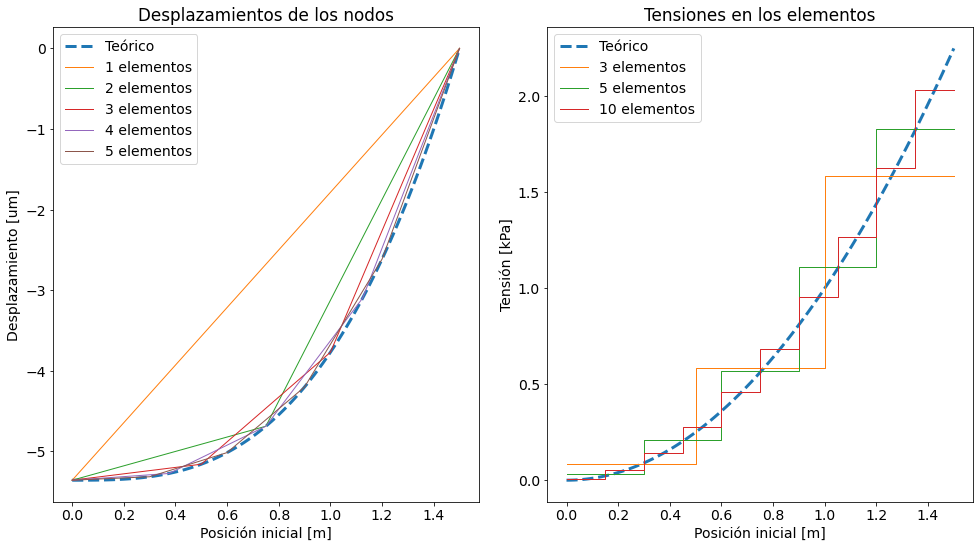

In [11]:
plt.rc('figure', figsize=(14, 8))

fig = plt.figure()
fig.clf()
ax = fig.subplots(1, 2)

x = np.linspace(0, L, 100)
ax[0].plot(x, desp(x)[1, :]*1e6, '--', label='Teórico', lw=3)
ax[1].plot(x, sigma(x)[1, :]*1e-6, '--', label='Teórico', lw=3)

for e in range(1, 6):
    E = 2.1E11*np.ones([e, 1])
    A = 1E-3*np.ones([e, 1])
    U, F, sig, R = mef.Ej03_solve(c, L, e, E, A)
    x_exp = np.linspace(0, L, e+1)
    ax[0].plot(x_exp, U*1e6, label=f'{e} elementos', lw=1)

ax[0].set_ylabel('Desplazamiento [um]')
ax[0].set_xlabel('Posición inicial [m]')
ax[0].set_title('Desplazamientos de los nodos')
ax[0].legend()

for e in [3, 5, 10]:
    E = 2.1E11*np.ones([e, 1])
    A = 1E-3*np.ones([e, 1])
    U, F, sig, R = mef.Ej03_solve(c, L, e, E, A)
    x_exp = np.linspace(0, L, e)

    MN = np.zeros([e+1]).reshape([-1, 1])
    suma = 0
    for i in range(e+1):
        MN[i] = suma
        suma += L/e
    sigg = np.zeros([2*e, 2])
    for i in range(e):
        sigg[2*i, 0] = sig[i]
        sigg[2*i+1, 0] = sig[i]
        sigg[2*i, 1] = MN[i]
        sigg[2*i+1, 1] = MN[i+1]

    ax[1].plot(sigg[:, 1], sigg[:, 0]*1e-6, label=f'{e} elementos', lw=1)

ax[1].set_ylabel('Tensión [kPa]')
ax[1].set_xlabel('Posición inicial [m]')
ax[1].set_title('Tensiones en los elementos')
ax[1].legend()

fig.tight_layout(pad=1.5)